## Loading the required packages

In [1]:
#Loading the required packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import StratifiedKFold, train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this will list all files under the input directory

import os

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Loading the data

In [2]:
#Load the data into directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


## Exploring the data

In [3]:
# load data into pandas dataframe

train_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
submission = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

In [4]:
# look at the first 10 rows of the train_df data
train_df.head(10)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
5,04517a3c90bd,0.209377,2615.81430,85.200147,8.541526,8.138688,4.013127,0.025578,12.547282,1.229900,...,0.173229,0.49706,1.164956,21.915512,72.611063,24177.595550,28.525186,82.527764,21.978000,0
6,049232ca8356,0.348249,1733.65412,85.200147,8.377385,15.312480,1.913544,0.025578,6.547778,1.229900,...,4.408484,0.86130,0.467337,17.878444,192.453107,3332.467494,34.166222,100.086808,0.065096,0
7,057287f2da6d,0.269199,966.45483,85.200147,21.174189,8.138688,4.987617,0.025578,9.408886,1.229900,...,6.591896,0.49706,0.277693,18.445866,109.693986,21371.759850,35.208102,31.424696,0.092873,0
8,0594b00fb30a,0.346113,3238.43674,85.200147,28.888816,8.138688,4.021986,0.025578,8.243016,3.626448,...,4.762291,1.18262,0.067730,17.245908,147.218610,4589.611956,29.771721,54.675576,0.073416,0
9,05f2bc0155cd,0.324748,5188.68207,85.200147,12.968687,8.138688,4.593392,0.025578,10.685041,1.229900,...,0.173229,1.57151,0.318331,24.515421,98.929757,5563.130949,21.994831,33.300970,21.978000,0


In [5]:
# look at the first 10 rows of the test_df data
test_df.head(10)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# look at the first 10 rows of the greeks_df data
greeks_df.head(10)

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
5,04517a3c90bd,A,C,M,B,10/1/2019
6,049232ca8356,A,C,M,B,5/29/2019
7,057287f2da6d,A,C,M,B,4/24/2019
8,0594b00fb30a,A,C,M,B,2/18/2019
9,05f2bc0155cd,A,B,M,B,6/19/2020


In [7]:
# checking the shape of the data, knowing this helps me avoid or resolve tensor issues.
train_df.shape, test_df.shape, greeks_df.shape

((617, 58), (5, 57), (617, 6))

In [8]:
# Let's look at the summary of the training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

All the columns are numerical except column EJ. We will treat EJ differently later on.
Some of the columns also have some missing values. We will address this in a bit.

In [9]:
# Let's take a look at the data distribution
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [10]:
# check the number of null values in the train_df. 
missing_data = train_df.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

       Empty Cells
Id               0
AB               0
AF               0
AH               0
AM               0
AR               0
AX               0
AY               0
AZ               0
BC               0
BD               0
BN               0
BP               0
BQ              60
BR               0
BZ               0
CB               2
CC               3
CD               0
CF               0
CH               0
CL               0
CR               0
CS               0
CU               0
CW               0
DA               0
DE               0
DF               0
DH               0
DI               0
DL               0
DN               0
DU               1
DV               0
DY               0
EB               0
EE               0
EG               0
EH               0
EJ               0
EL              60
EP               0
EU               0
FC               1
FD               0
FE               0
FI               0
FL               1
FR               0
FS               2
GB          

<Axes: >

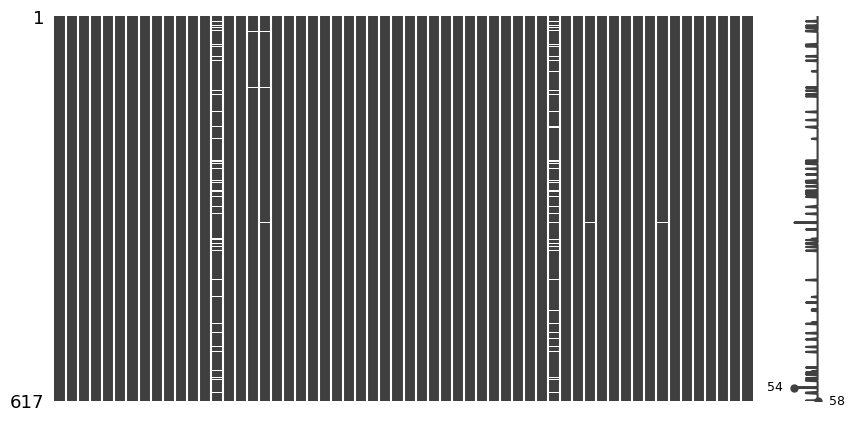

In [11]:
#Let's visualize the midding data
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(train_df, figsize=(10,5), fontsize=11)

The white bars in the graph above show missing data. It seems there is some relationship between the columns with missing data. For example, the rows where data are missing for EQ are also missing data for EL. 

In [12]:
#fill the null values with the average of that columns values
for column in ['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']:
    avg = train_df[column].mean()
    train_df.fillna(value=avg, inplace=True)
    print(avg)

98.32873688509873
77.17295015521911
1.1635499699761689
1.9593442513534824
72.37800659903715
71.38526558328216
5.583758864943435
0.7388662929824918
8.676500164278929


In [13]:
# check the number of null values in the test_df
test_df.isna().sum()

Id     0
AB     0
AF     0
AH     0
AM     0
AR     0
AX     0
AY     0
AZ     0
BC     0
BD     0
BN     0
BP     0
BQ     0
BR     0
BZ     0
CB     0
CC     0
CD     0
CF     0
CH     0
CL     0
CR     0
CS     0
CU     0
CW     0
DA     0
DE     0
DF     0
DH     0
DI     0
DL     0
DN     0
DU     0
DV     0
DY     0
EB     0
EE     0
EG     0
EH     0
EJ     0
EL     0
EP     0
EU     0
FC     0
FD     0
FE     0
FI     0
FL     0
FR     0
FS     0
GB     0
GE     0
GF     0
GH     0
GI     0
GL     0
dtype: int64

In [14]:
# Let's get the name of all the columns of the training set
train_df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

The 'Class' is column is what we aim to be able to predict with our model. Let's visualize the classes to know how it is distributed among the two classes (0 and 1)

In [15]:
# check to see the the total amount of each label contained in the data. It looks like the data is imbalanced. 
# Might have to utilize some resampling techniques.
train_df['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

<Axes: ylabel='Class'>

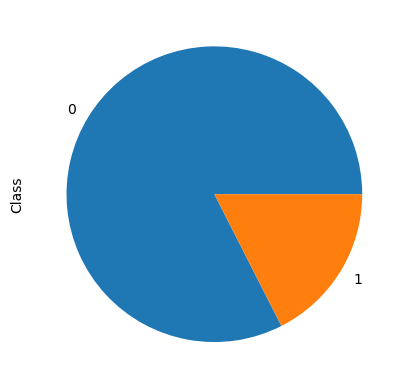

In [16]:
# Visualizing the Classes
plot_df = train_df.Class.value_counts()
plot_df.plot(kind="pie")

The data is imbalanced and we will employ some technique to address it.

## Data Preprocessing

We will drop the Id and EJ columns which are both string columns. The Id column is not useful for the modeling. For the EJ column, we could employ one-hot encoding to convert it to numerical columns but we decided to drop it because the test set provided only has one category of value for the EJ column as opposed to two categories in the training set. 

In [17]:
# Let's drop the Id, and EJ columns

train_df.drop(["Id", "EJ"], inplace=True, axis=1)
train_df.shape

(617, 56)

### Addressing data imbalance

We will use class weighting to address the imbalance in the dataset. 

In [18]:
# Calculate the number of negative and positive values in `Class` column
neg, pos = np.bincount(train_df['Class'])
# Calculate total samples
total = neg + pos
print(f'Examples:\n    Total: {total}\n    Positive: {pos} ({100 * pos / total:.2f}% of total)\n')

Examples:
    Total: 617
    Positive: 108 (17.50% of total)



In [19]:
# Calculate the number of samples for each label.
neg, pos = np.bincount(train_df['Class'])

# Calculate total samples.
total = neg + pos

# Calculate the weight for each label.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0:.2f}')
print(f'Weight for class 1: {weight_for_1:.2f}')

Weight for class 0: 0.61
Weight for class 1: 2.86


### Data Normalization

In [20]:
# Normalize the feature columns
features = train_df.drop(columns=['Class'])
targets = train_df['Class']

features = (features - features.mean()) / features.std()
features.head(3)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,-0.571689,-0.170837,-0.261457,-0.237696,-0.189141,-1.899018,-0.08335,-0.173361,-0.038323,-0.405054,...,-2.224803,0.141916,-0.035777,-0.112592,-0.939332,-0.409927,-0.654979,-0.948222,0.530811,-0.782558
1,-0.708530,-1.096911,-0.261457,-0.028678,-0.189141,-0.749849,-0.08335,0.678369,-0.104702,0.048502,...,0.084474,-0.447877,-0.060517,-0.029708,-1.144142,-0.409927,0.687335,-0.238669,-0.508805,1.216573
2,-0.015200,-0.376863,-0.261457,-0.094768,-0.189141,0.465284,-0.08335,0.519032,-0.104702,-0.071031,...,0.516641,0.175971,-0.050981,0.080409,1.636616,-0.298967,-0.051808,-0.351458,-0.424410,-0.775552


In [21]:
features.shape, targets.shape

((617, 55), (617,))

## Model

In [22]:
# Building the model with Tensorflow Functional API
from tensorflow.keras import regularizers

def get_model():
    inputs = keras.Input(shape=(None, 55))
    features = layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu')(inputs)
    features = layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu')(features)
    features = layers.Dense(32, kernel_regularizer = regularizers.l2(0.01), activation='relu')(features)
    features = layers.Dense(16, kernel_regularizer = regularizers.l2(0.01), activation='relu')(features)
    outputs = layers.Dense(1, activation='sigmoid')(features)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='accuracy')
    return model

In [23]:
# Define functions to plot loss and accuracy

# Plot loss values
def plot_loss(loss, validation_loss):
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, validation_loss, "r", label="Validation loss")
    plt.title("Training & validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Plot accuracy values
def plot_accuracy(accuracy, val_accuracy):
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, "b", label="Training acc")
    plt.plot(epochs, val_accuracy, "r", label="Validation acc")
    plt.title("Training & validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## Training the model with k-fold cross validation

_______FOLD: 1_______ 



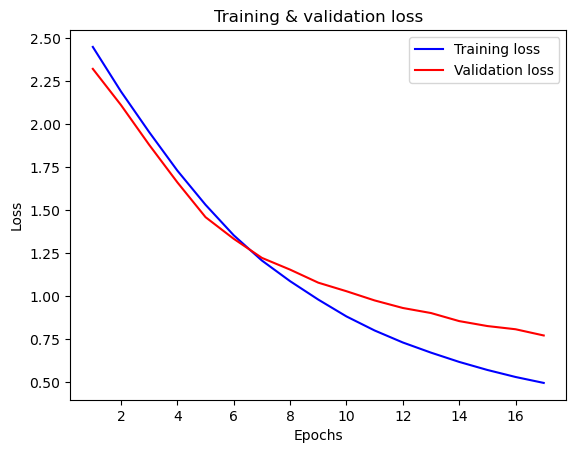

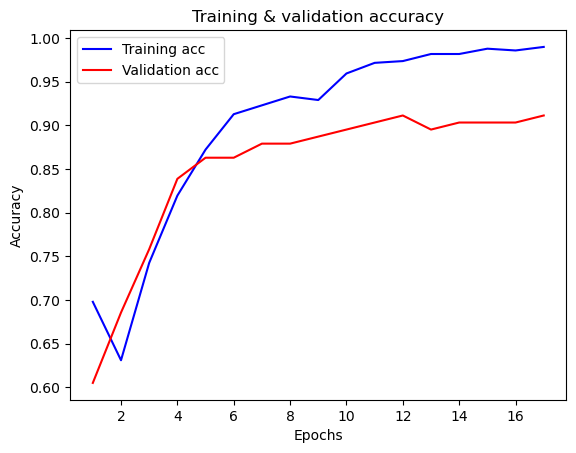

4/4 [==============================] - 0s 4ms/step - loss: 0.7703 - accuracy: 0.9113
Validation Accuracy: 0.9113, Area Under the Curve: 0.8944

_______FOLD: 2_______ 



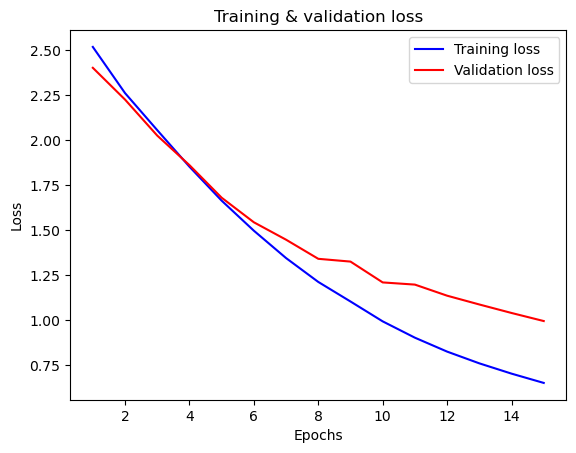

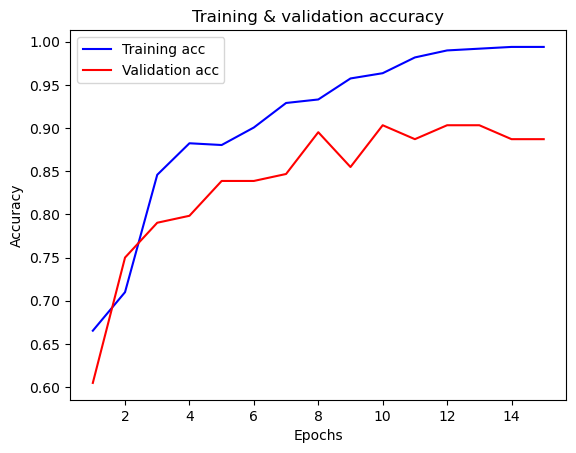

4/4 [==============================] - 0s 3ms/step - loss: 0.9953 - accuracy: 0.8871
Validation Accuracy: 0.8871, Area Under the Curve: 0.8886

_______FOLD: 3_______ 



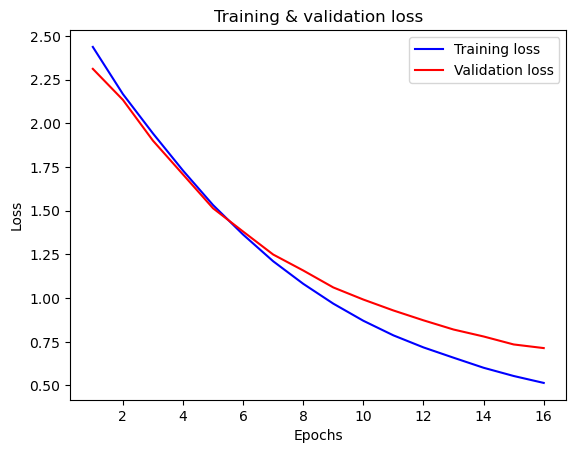

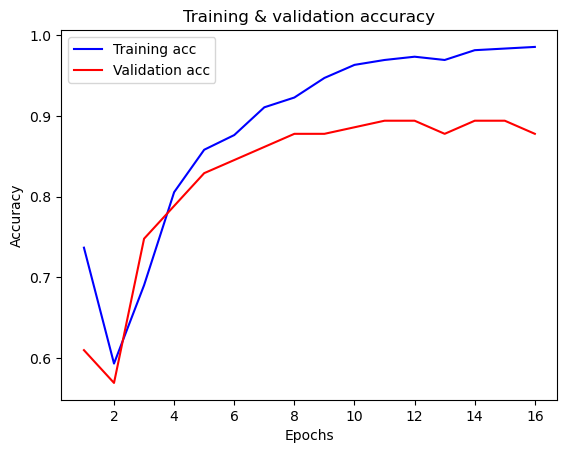

4/4 [==============================] - 0s 10ms/step - loss: 0.7140 - accuracy: 0.8780
Validation Accuracy: 0.8780, Area Under the Curve: 0.9334

_______FOLD: 4_______ 



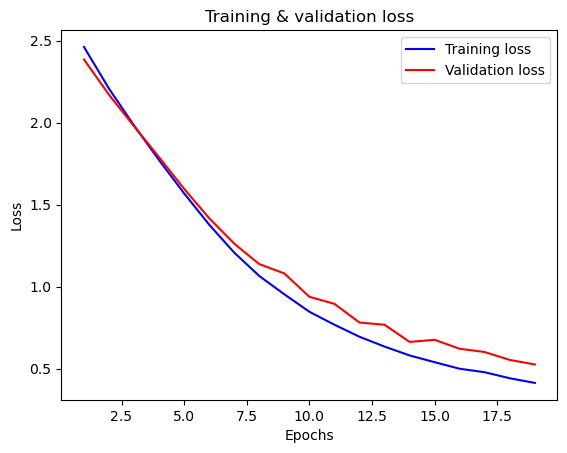

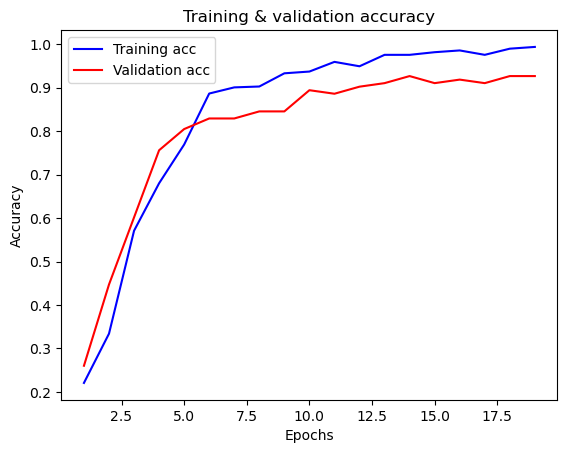

4/4 [==============================] - 0s 4ms/step - loss: 0.5250 - accuracy: 0.9268
Validation Accuracy: 0.9268, Area Under the Curve: 0.9748

_______FOLD: 5_______ 



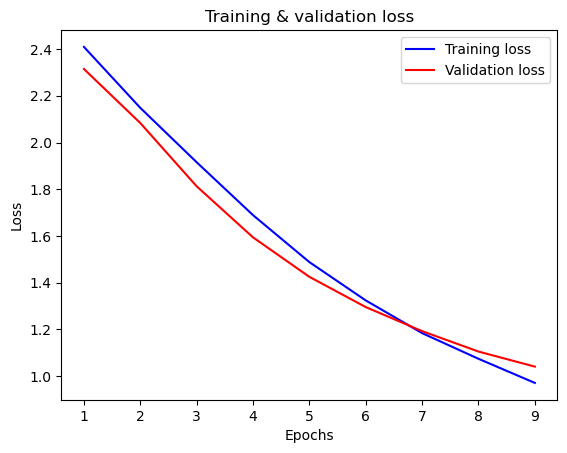

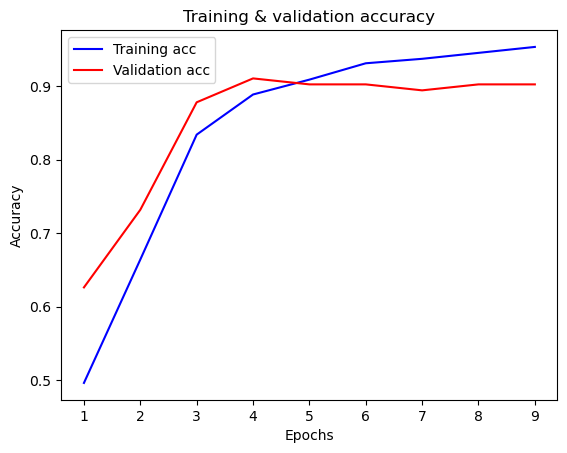

4/4 [==============================] - 0s 3ms/step - loss: 1.0411 - accuracy: 0.9024
Validation Accuracy: 0.9024, Area Under the Curve: 0.9468



Average Validation Accuracy: 0.9011, Out of fold area under curve: 0.9276



In [24]:
# Training the model with k-fold
from sklearn.metrics import roc_auc_score

# Break up the data into testing and training samples using KFold method
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2)
fold = 1
aucs = []
validation_accuracy = []

# create empty dictionary to save the models
models = {}

callbacks_list = [keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)]

for train_idx, test_idx in k_fold.split(features, targets):

    # use the indicies to pull out training samples
    X_tr = features.loc[train_idx]
    y_tr = targets.loc[train_idx]

    # use the indicies to pull out testing samples
    X_val = features.loc[test_idx]
    y_val = targets.loc[test_idx]
    
    print(f'_______FOLD: {fold}_______', '\n')

    # call the create model function then fit/train
    model = get_model()
    history = model.fit(x=X_tr, y=y_tr, epochs=100, class_weight=class_weight, callbacks=callbacks_list, validation_data = (X_val, y_val), verbose=0)

    # Save the model
    models[f"fold_{fold}"] = model
    
    # Obtain the metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plot_loss(loss=loss, validation_loss=val_loss)
    plot_accuracy(accuracy=acc, val_accuracy=val_acc)
        
    # Obtain the predictions
    pred = model.predict(X_val)
    val_scores = model.evaluate(x=X_val, y=y_val)
    val_accuracy = val_scores[1]
    area_under_curve = roc_auc_score(y_val, pred)
    aucs.append(area_under_curve)
    validation_accuracy.append(val_accuracy)
    print(f'Validation Accuracy: {val_accuracy:0.4f}, Area Under the Curve: {area_under_curve:0.4f}\n')

    Out_of_fold_area_under_curve = np.mean(aucs)

    fold += 1

print("\n")

print(f'Average Validation Accuracy: {np.mean(validation_accuracy):0.4f}, Out of fold area under curve: {Out_of_fold_area_under_curve:0.4f}\n')

In [25]:
models.keys()

dict_keys(['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5'])

## Prediction
We will predict the dummy test set with the model

In [26]:
# Drop the columns Id and EJ to maintain the same shape with the training data
test_df.drop(["Id", "EJ"], inplace=True, axis=1)
test_df.shape

(5, 55)

In [27]:
# Predict the test set with the models
for i in models.keys():
    pred = models[i].predict(test_df)
    n_pred = [[round(abs(i-1), 8), i] for i in pred.ravel()]
    print(f"{i} predictions: ", n_pred, "\n")

1/1 [==============================] - 0s 18ms/step
fold_1 predictions:  [[0.84996256, 0.15003744], [0.84996256, 0.15003744], [0.84996256, 0.15003744], [0.84996256, 0.15003744], [0.84996256, 0.15003744]] 

1/1 [==============================] - 0s 18ms/step
fold_2 predictions:  [[0.83038817, 0.16961183], [0.83038817, 0.16961183], [0.83038817, 0.16961183], [0.83038817, 0.16961183], [0.83038817, 0.16961183]] 

1/1 [==============================] - 0s 43ms/step
fold_3 predictions:  [[0.85044476, 0.14955524], [0.85044476, 0.14955524], [0.85044476, 0.14955524], [0.85044476, 0.14955524], [0.85044476, 0.14955524]] 

1/1 [==============================] - 0s 17ms/step
fold_4 predictions:  [[0.88263048, 0.11736952], [0.88263048, 0.11736952], [0.88263048, 0.11736952], [0.88263048, 0.11736952], [0.88263048, 0.11736952]] 

1/1 [==============================] - 0s 17ms/step
fold_5 predictions:  [[0.75861235, 0.24138765], [0.75861235, 0.24138765], [0.75861235, 0.24138765], [0.75861235, 0.24138765]

## Submission


In [28]:
FEATURE_COLUMNS = [i for i in train_df.columns if i not in ["Id"]]

In [29]:
# Predict the test set with the model
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
test_df_columns = test_df.columns.tolist()
TEST_FEATURE_COLUMNS = [i for i in FEATURE_COLUMNS \
                        if i in test_df_columns and i != "Class"]
test_df = test_df[TEST_FEATURE_COLUMNS]

In [30]:
# Fill the null values with the average of that columns values
for column in TEST_FEATURE_COLUMNS:
    avg = test_df[column].mean()
    test_df.fillna(value=avg, inplace=True)

In [31]:
#Normalize the test set

test_df = (test_df - test_df.mean()) / test_df.std()
test_df.head(3)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# using the model to predict the test set

predictions = models['fold_4'].predict(test_df)

n_predictions= [[abs(i-1), i] for i in predictions.ravel()]
n_predictions

1/1 [==============================] - 0s 17ms/step


[[nan, nan], [nan, nan], [nan, nan], [nan, nan], [nan, nan]]

In [33]:
# Saving to submission format
submission = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv")
submission[['class_0', 'class_1']] = n_predictions
submission.to_csv('/kaggle/working/submission.csv', index=False, float_format='%.08f')

In [34]:
submission

,Id,class_0,class_1
0,00eed32682bb,NaN,NaN
1,010ebe33f668,NaN,NaN
2,02fa521e1838,NaN,NaN
3,040e15f562a2,NaN,NaN
4,046e85c7cc7f,NaN,NaN
